In [2]:
#聚类
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [3]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']
df

,Date,Word,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more,hard rate
0,2022-01-07,slump,1,3,23,39,24,9,1,0.016892
1,2022-01-08,crank,1,5,23,31,24,14,2,0.017369
2,2022-01-09,gorge,1,3,13,27,30,22,4,0.020912
3,2022-01-10,query,1,4,16,30,30,17,2,0.020927
4,2022-01-11,drink,1,9,35,34,16,5,1,0.019606
...,...,...,...,...,...,...,...,...,...,...
351,2022-12-27,condo,0,2,17,35,29,14,3,0.096365
352,2022-12-28,impel,0,3,21,40,25,9,1,0.096081
353,2022-12-29,havoc,0,2,16,38,30,12,2,0.095945
354,2022-12-30,molar,0,4,21,38,26,9,1,0.093048


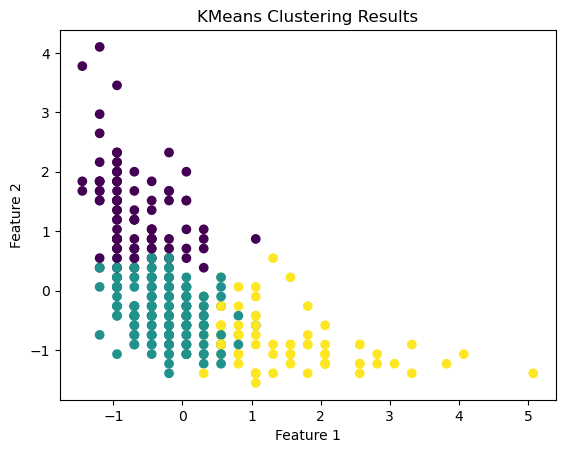

array([1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0,
       1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2,
       1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1,

In [23]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=3)
# 拟合模型并预测
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)
# 可视化结果
plt.scatter(data_scaled[:, 1], data_scaled[:, 5], c=cluster_labels)
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
cluster_labels

In [60]:
df['class'] = cluster_labels
df.to_excel("feature15.xlsx")
df

,Date,Word,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more,hard rate,class
0,2022-01-07,slump,1,3,23,39,24,9,1,0.016892,1
1,2022-01-08,crank,1,5,23,31,24,14,2,0.017369,1
2,2022-01-09,gorge,1,3,13,27,30,22,4,0.020912,0
3,2022-01-10,query,1,4,16,30,30,17,2,0.020927,0
4,2022-01-11,drink,1,9,35,34,16,5,1,0.019606,2
...,...,...,...,...,...,...,...,...,...,...,...
351,2022-12-27,condo,0,2,17,35,29,14,3,0.096365,1
352,2022-12-28,impel,0,3,21,40,25,9,1,0.096081,1
353,2022-12-29,havoc,0,2,16,38,30,12,2,0.095945,1
354,2022-12-30,molar,0,4,21,38,26,9,1,0.093048,1


In [63]:
test_data = pd.read_excel("feature15.xlsx", index_col=False)
#test_data['class'] = 1
test_data
group_data1 = test_data.groupby('class')
list(group_data1)[0]


(0,
           Date   Word  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
 2   2022-01-09  gorge      1        3       13       27       30       22   
 3   2022-01-10  query      1        4       16       30       30       17   
 5   2022-01-12  favor      1        4       15       26       29       21   
 6   2022-01-13  abbey      1        2       13       29       31       20   
 7   2022-01-14  tangy      1        4       21       30       24       15   
 ..         ...    ...    ...      ...      ...      ...      ...      ...   
 316 2022-11-20  brave      1        6       17       27       27       18   
 326 2022-12-01  eject      0        2       11       35       36       14   
 330 2022-12-05  woken      0        2       10       25       36       23   
 346 2022-12-22  excel      0        1       13       34       34       15   
 350 2022-12-26  judge      0        2        8       16       26       33   
 
      7 or more  hard rate  class  
 2            4   0.02

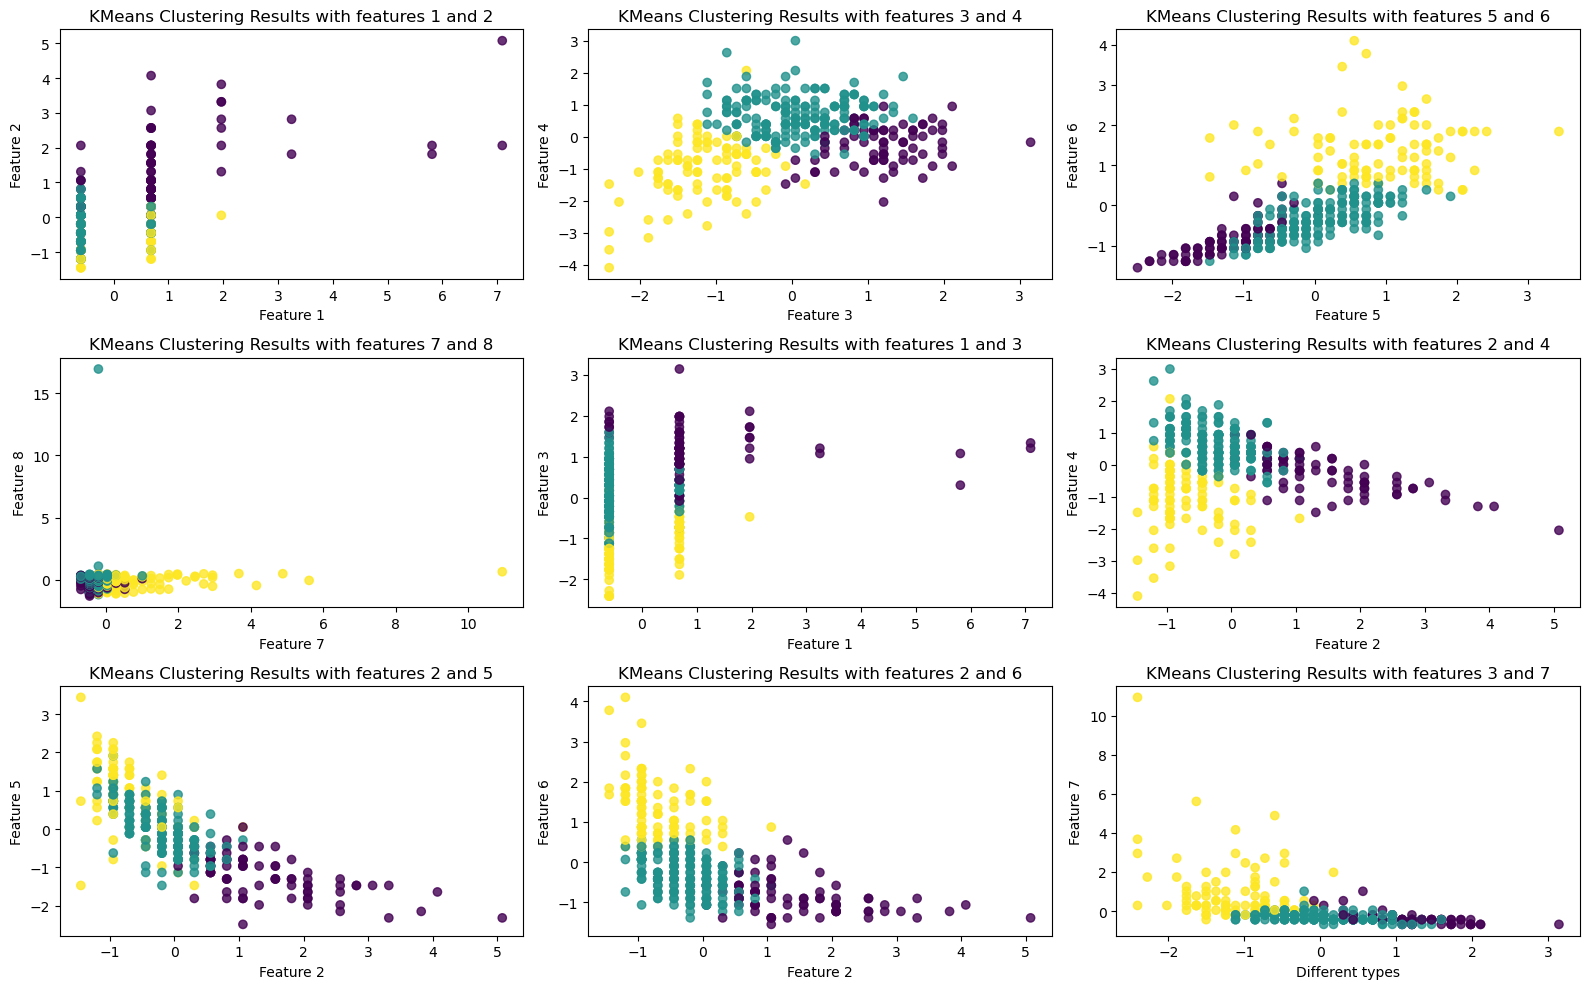

In [67]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']

# 标准化数据；KMeans算法是基于欧氏距离进行计算的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=3)

# 拟合模型并预测
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

# 定义标签名称
labels = df['Word'].values

# 定义子图数量和排列方式
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
axs = axs.ravel()

# 不同的data_scaled[]选取进行聚类
for i, idx in enumerate([(0, 1), (2, 3), (4, 5), (6, 7), (0, 2), (1, 3), (1, 4), (1, 5), (2, 6),]):
    # 可视化结果
    axs[i].scatter(data_scaled[:, idx[0]], data_scaled[:,idx[1]], c=cluster_labels, alpha=0.8)
    axs[i].set_title(f'KMeans Clustering Results with features {idx[0]+1} and {idx[1]+1}')
    axs[i].set_xlabel(f'Feature {idx[0]+1}')
    axs[i].set_ylabel(f'Feature {idx[1]+1}')

    # 添加标签名称
    #for j in range(len(labels)):
        #axs[i].annotate(labels[j], (data_scaled[j, idx[0]],data_scaled[j, idx[1]]), fontsize=8)

# 显示整合后的所有图像
plt.tight_layout()
plt.xlabel("Different types")
plt.show()


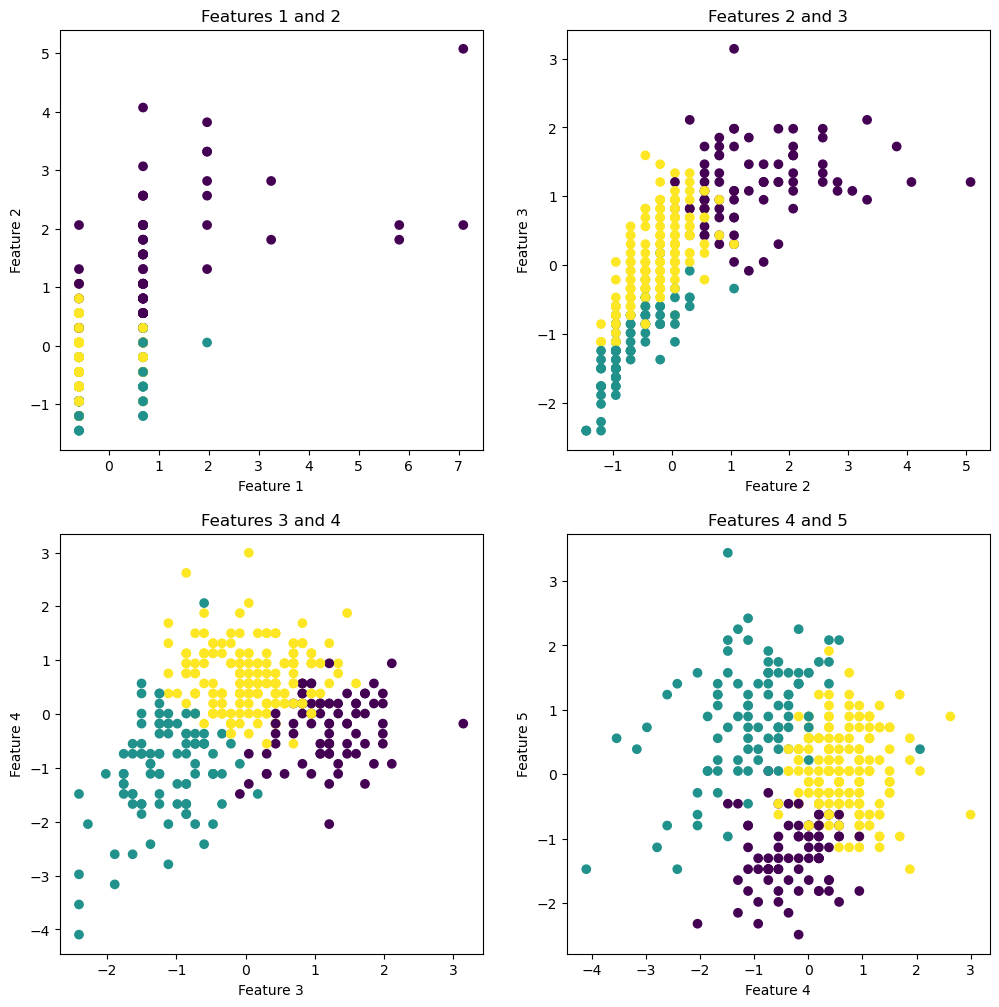

In [9]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=3)

# 拟合模型并预测
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

# 绘制不同特征选择下的聚类结果
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, ax in enumerate(axs.flatten()):
    if i < data_scaled.shape[1] - 1:
        ax.scatter(data_scaled[:, i], data_scaled[:, i+1], c=cluster_labels)
        ax.set_title(f'Features {i+1} and {i+2}')
        ax.set_xlabel(f'Feature {i+1}')
        ax.set_ylabel(f'Feature {i+2}')

plt.show()


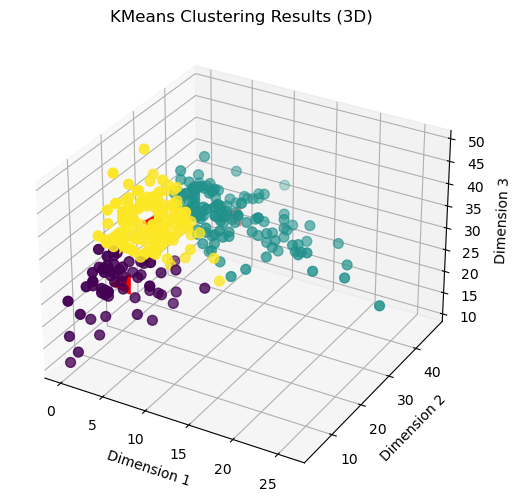

In [104]:
from mpl_toolkits.mplot3d import Axes3D
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']
# 选择聚类数
kmeans = KMeans(n_clusters=3)

# 拟合模型并预测
kmeans.fit(data)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# 可视化结果
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 1], data.iloc[:, 2],data.iloc[:, 3], c=cluster_labels, s=50)
ax.scatter(cluster_centers[:, 1], cluster_centers[:, 2],cluster_centers[:, 3], marker='<', color='r', s=200)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('KMeans Clustering Results (3D)')
plt.show()


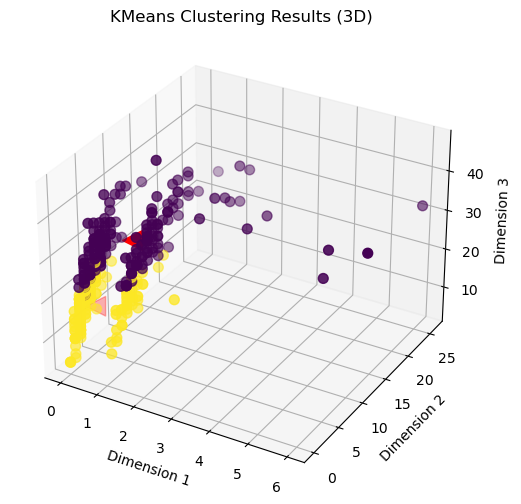

In [77]:
from mpl_toolkits.mplot3d import Axes3D
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']
# 选择聚类数
kmeans = KMeans(n_clusters=2)

# 拟合模型并预测
kmeans.fit(data)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# 可视化结果
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1],data.iloc[:, 2], c=cluster_labels, s=50)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],cluster_centers[:, 2], marker='<', color='r', s=200)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('KMeans Clustering Results (3D)')
plt.show()


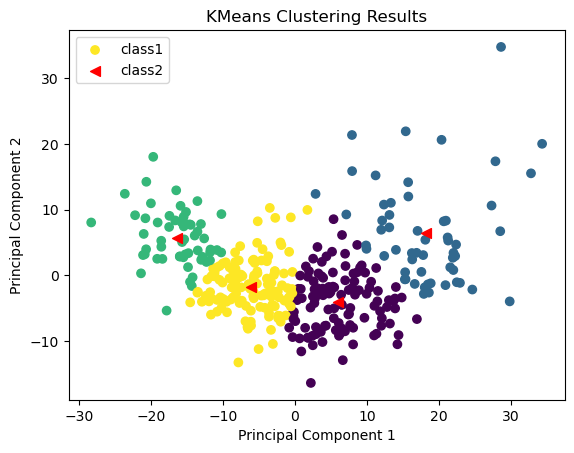

In [45]:
#数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx",index_col=False)
data = df.loc[:, '1 try':'hard rate']
# 标准化数据；KMeans算法是基于欧氏距离进行计算的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# 选择聚类数
kmeans = KMeans(n_clusters=4)
# 使用PCA进行数据降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
# 拟合模型并预测
kmeans.fit(data_pca)
cluster_labels = kmeans.predict(data_pca)
cluster_centers = kmeans.cluster_centers_
# 可视化结果
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0],cluster_centers[:, 1], marker='<', color='r', s=50)
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

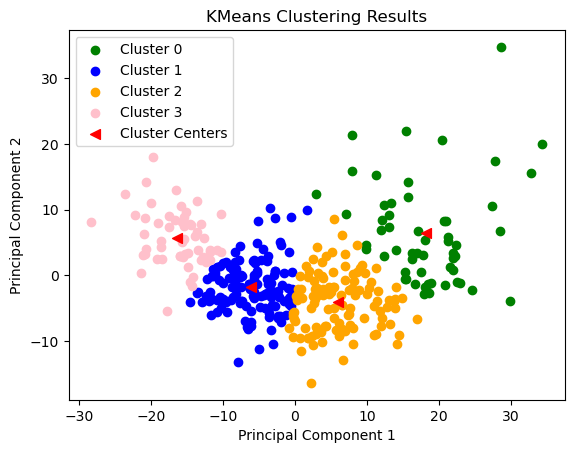

In [4]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']

# 标准化数据；KMeans算法是基于欧氏距离进行计算的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=4)

# 使用PCA进行数据降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# 拟合模型并预测
kmeans.fit(data_pca)
cluster_labels = kmeans.predict(data_pca)
cluster_centers = kmeans.cluster_centers_

# 定义颜色和标签列表
colors = ['green', 'blue', 'orange', 'pink']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# 可视化结果
for i in range(4):
    plt.scatter(data_pca[cluster_labels == i, 0],data_pca[cluster_labels == i, 1], color=colors[i], label=labels[i])

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='<', color='red', s=50, label='Cluster Centers')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Explained Variance Ratio: [0.70747402 0.21422848 0.04979533]


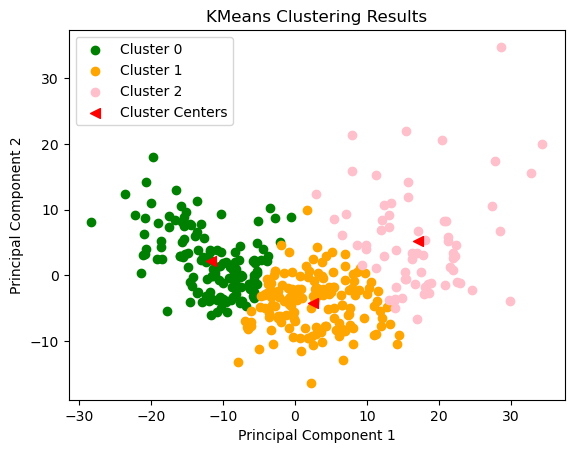

In [5]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']

# 标准化数据；KMeans算法是基于欧氏距离进行计算的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=3)

# 使用PCA进行数据降维
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# 查看主成分的解释程度
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# 拟合模型并预测
kmeans.fit(data_pca)
cluster_labels = kmeans.predict(data_pca)
cluster_centers = kmeans.cluster_centers_

# 定义颜色和标签列表
colors = ['green','orange', 'pink']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2',]

# 可视化结果
for i in range(3):
    plt.scatter(data_pca[cluster_labels == i, 0],data_pca[cluster_labels == i, 1], color=colors[i], label=labels[i])

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],marker='<', color='red', s=50, label='Cluster Centers')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [6]:
for i, pc in enumerate(pca.components_):
    features = list(data.columns)
    pc_features = [f'{feature}: {weight:.2f}' for feature,weight in zip(features, pc)]
    print(f'PC{i+1} contains the following features:')
    print(', '.join(pc_features))


PC1 contains the following features:
1 try: -0.02, 2 tries: -0.25, 3 tries: -0.65, 4 tries: -0.21, 5 tries: 0.43, 6 tries: 0.50, 7 or more: 0.20, hard rate: -0.00
PC2 contains the following features:
1 try: 0.05, 2 tries: 0.31, 3 tries: 0.14, 4 tries: -0.71, 5 tries: -0.42, 6 tries: 0.24, 7 or more: 0.39, hard rate: -0.00
PC3 contains the following features:
1 try: -0.08, 2 tries: -0.46, 3 tries: -0.03, 4 tries: 0.38, 5 tries: -0.39, 6 tries: -0.07, 7 or more: 0.70, hard rate: 0.00


In [10]:
cluster_labels
df['class'] = cluster_labels
df.to_excel("PCA.xlsx")

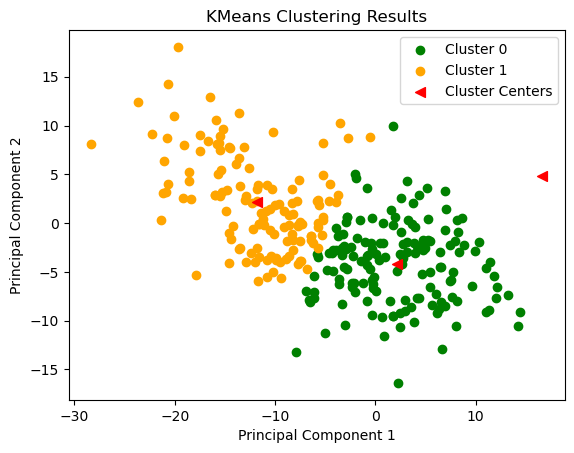

In [76]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']

# 标准化数据；KMeans算法是基于欧氏距离进行计算的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=3)

# 使用PCA进行数据降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# 拟合模型并预测
kmeans.fit(data_pca)
cluster_labels = kmeans.predict(data_pca)
cluster_centers = kmeans.cluster_centers_

# 定义颜色和标签列表
colors = ['green', 'orange']
labels = ['Cluster 0', 'Cluster 1',]

# 可视化结果
for i in range(2):
    plt.scatter(data_pca[cluster_labels == i, 0],data_pca[cluster_labels == i, 1], color=colors[i], label=labels[i])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],marker='<', color='red', s=50, label='Cluster Centers')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


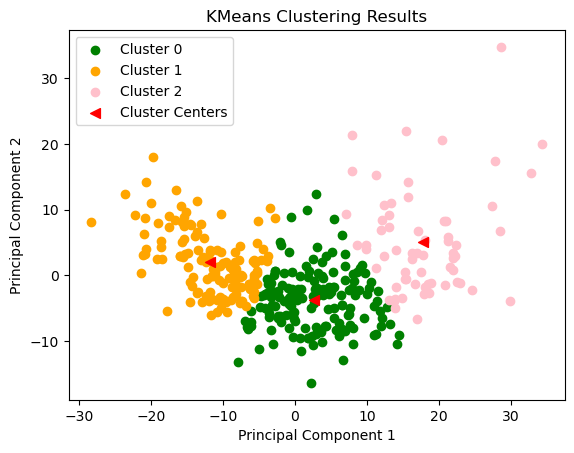

In [92]:
# 数据的导入
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']

# 标准化数据；KMeans算法是基于欧氏距离进行计算的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 使用PCA进行数据降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=3)

# 拟合模型并预测
kmeans.fit(data_pca)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# 定义颜色和标签列表
colors = ['green', 'orange', 'pink']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# 可视化结果
for i in range(3):
    plt.scatter(data_pca[cluster_labels == i, 0],
                data_pca[cluster_labels == i, 1], color=colors[i], label=labels[i])
    for j in range(len(data)):
        if df.loc[j, 'Word'] == labels[i]:
            plt.annotate(df.loc[j, 'Word'], (data_pca[j, 0], data_pca[j, 1]))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],marker='<', color='red', s=50, label='Cluster Centers')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


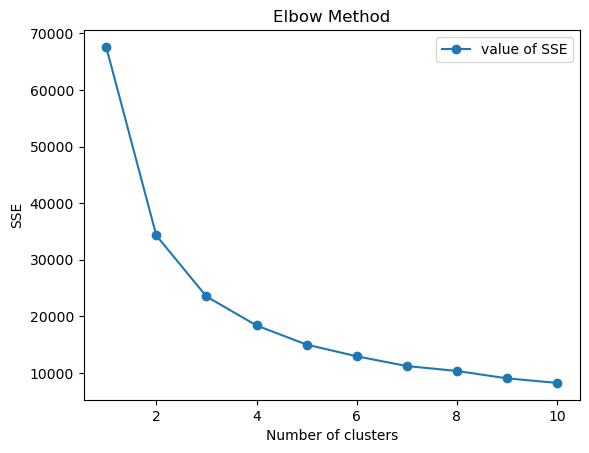

In [80]:
# 手肘图的绘制——误差平方和（SSE）
# 使用PCA进行数据降维
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)
# 计算SSE
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)
# 绘制手肘图
plt.plot(range(1, 11), sse,'-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.legend(['value of SSE'])
plt.show()


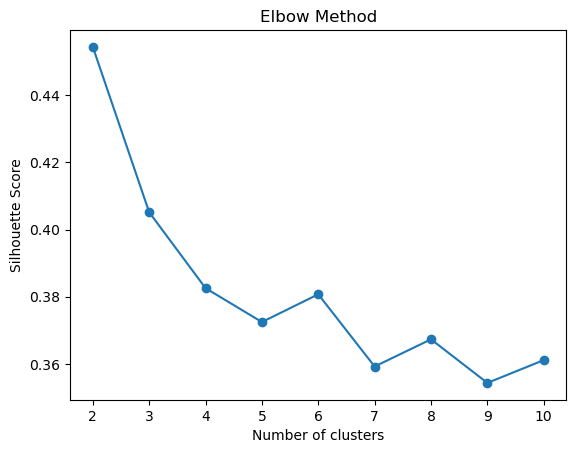

In [35]:
# sklearn.metrics.silhouette_score()函数来计算轮廓系数
# 使用PCA进行数据降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# 计算轮廓系数
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data_pca)
    score = silhouette_score(data_pca, kmeans.labels_)
    silhouette_scores.append(score)

# 绘制手肘图
plt.plot(range(2, 11), silhouette_scores,'-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [87]:
from sklearn.neighbors import KNeighborsClassifier

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)
cluster_labels = kmeans.predict(data_pca)

# 训练KNN分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_pca, cluster_labels)

# 对测试数据进行分类
test_data1 = [0, 2, 17, 37, 29, 12, 2, 0.0932]
test_data_scaled = scaler.transform([test_data1])
test_data_pca = pca.transform(test_data_scaled)
test_cluster1 = knn.predict(test_data_pca)[0]

test_data2 = [0, 2, 8, 16, 26, 33, 14, 0.1021]
test_data_scaled = scaler.transform([test_data2])
test_data_pca = pca.transform(test_data_scaled)
test_cluster2 = knn.predict(test_data_pca)[0]

print("Test data belongs to cluster:", test_cluster1)
print("Test data belongs to cluster:", test_cluster2)


Test data belongs to cluster: 1
Test data belongs to cluster: 1


d:\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
d:\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
d:\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
d:\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


Explained Variance Ratio: [0.70747402 0.21422848 0.04979533]


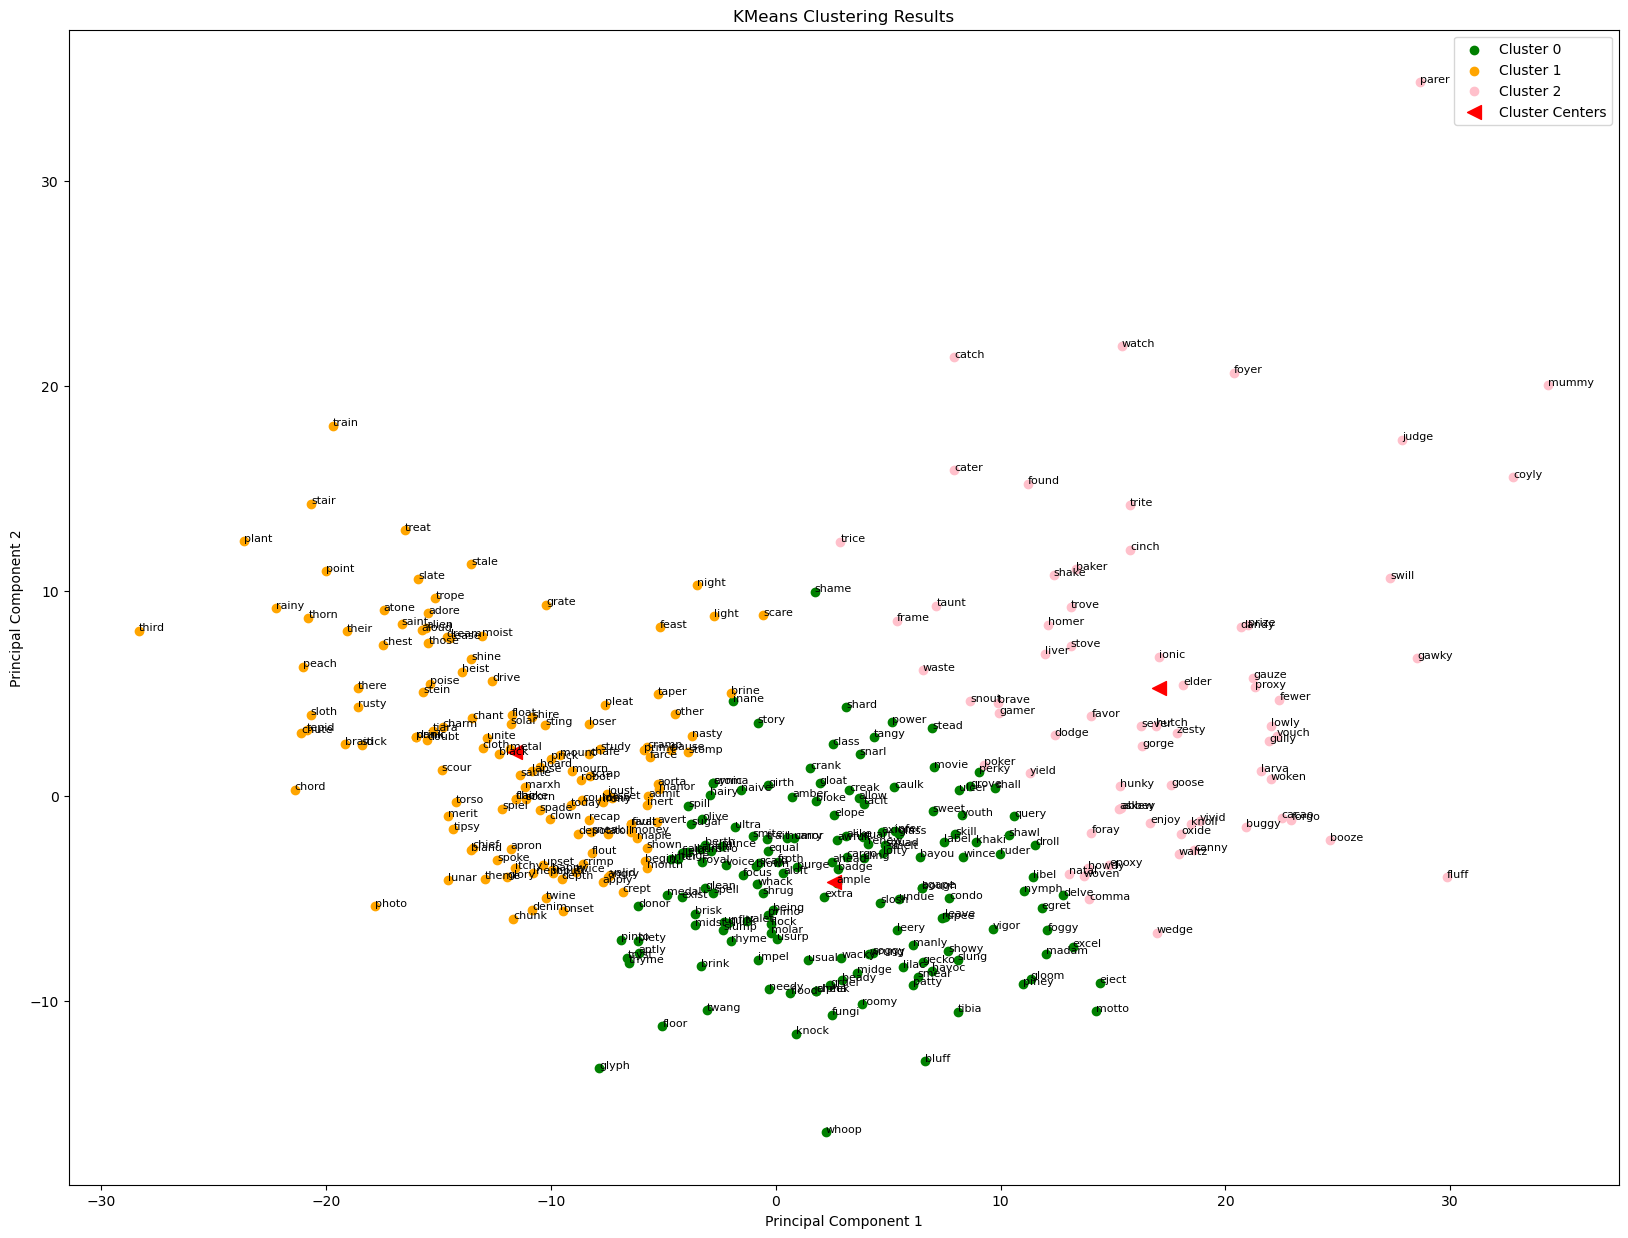

In [102]:
# 数据的导入
fig = plt.figure(figsize=(20, 15))  # 设置画布的大小为10x8英寸
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']

# 标准化数据；KMeans算法是基于欧氏距离进行计算的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 选择聚类数
kmeans = KMeans(n_clusters=3)

# 使用PCA进行数据降维
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# 查看主成分的解释程度
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# 拟合模型并预测
kmeans.fit(data_pca)
cluster_labels = kmeans.predict(data_pca)
cluster_centers = kmeans.cluster_centers_

# 定义颜色和标签列表
colors = ['green', 'orange', 'pink']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2',]

# 可视化结果
for i in range(3):
    plt.scatter(data_pca[cluster_labels == i, 0],
                data_pca[cluster_labels == i, 1], color=colors[i], label=labels[i])
    for xy, label in zip(data_pca[cluster_labels == i, :2], df.loc[cluster_labels == i, 'Word']):
        plt.text(xy[0], xy[1], label, fontsize=8)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='<', color='red', s=100, label='Cluster Centers')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


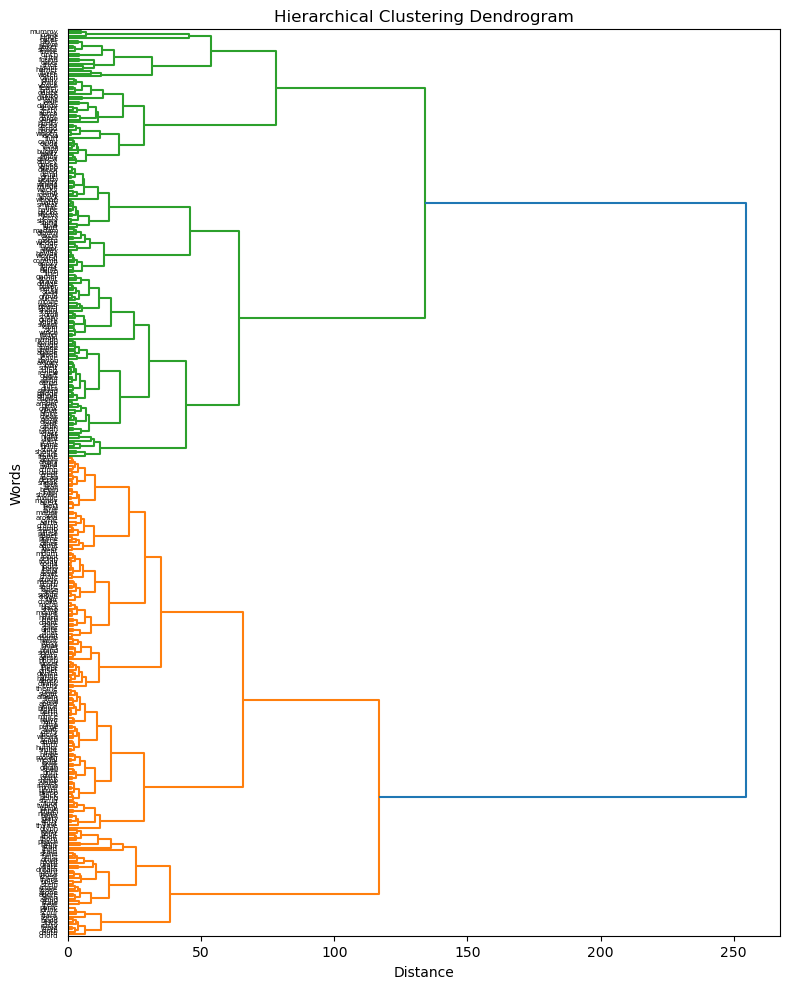

In [64]:
#谱系聚类
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据并去除Word列
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']


# 通过ward方法计算距离矩阵
Z = linkage(data, method="ward")

# 画谱系聚类树
plt.figure(figsize=(8, 10))
dendrogram(Z, labels=df["Word"].values, orientation="right")


# 设置图像属性
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Words')
plt.tight_layout()

# 显示图像
plt.show()


In [35]:
Z

array([[2.89000000e+02, 3.40000000e+02, 2.91466962e-04, 2.00000000e+00],
       [4.00000000e+00, 8.00000000e+00, 3.00407176e-03, 2.00000000e+00],
       [3.80000000e+01, 3.90000000e+01, 3.61574854e-03, 2.00000000e+00],
       ...,
       [7.00000000e+02, 7.06000000e+02, 1.16816907e+02, 1.88000000e+02],
       [7.05000000e+02, 7.07000000e+02, 1.33976855e+02, 1.68000000e+02],
       [7.08000000e+02, 7.09000000e+02, 2.54669177e+02, 3.56000000e+02]])

Cluster 1:
4      drink
8      panic
12     point
25     those
26     moist
46     thorn
67     tease
73     their
76     chest
85     trope
92     stair
105    plant
109    heist
116    train
121    shine
130    scour
139    tiara
146    peach
157    atone
169    rusty
210    alien
224    treat
252    chute
253    stick
257    saint
259    grate
271    sloth
282    stein
299    aloud
301    dream
302    stale
305    rainy
313    there
319    drive
323    tepid
328    torso
329    adore
334    braid
341    chord
343    slate
344    third
348    poise
Name: Word, dtype: object

Cluster 2:
0      slump
9      solar
10     shire
13     robot
14     prick
       ...  
342    taper
345    lunar
347    aorta
352    impel
354    molar
Name: Word, Length: 146, dtype: object

Cluster 3:
1      crank
3      query
7      tangy
15     wince
21     perky
       ...  
346    excel
349    extra
351    condo
353    havoc
355    manly
Name: Word, Length: 115, dtype: object

Cluster 4:
2      gorge
5   

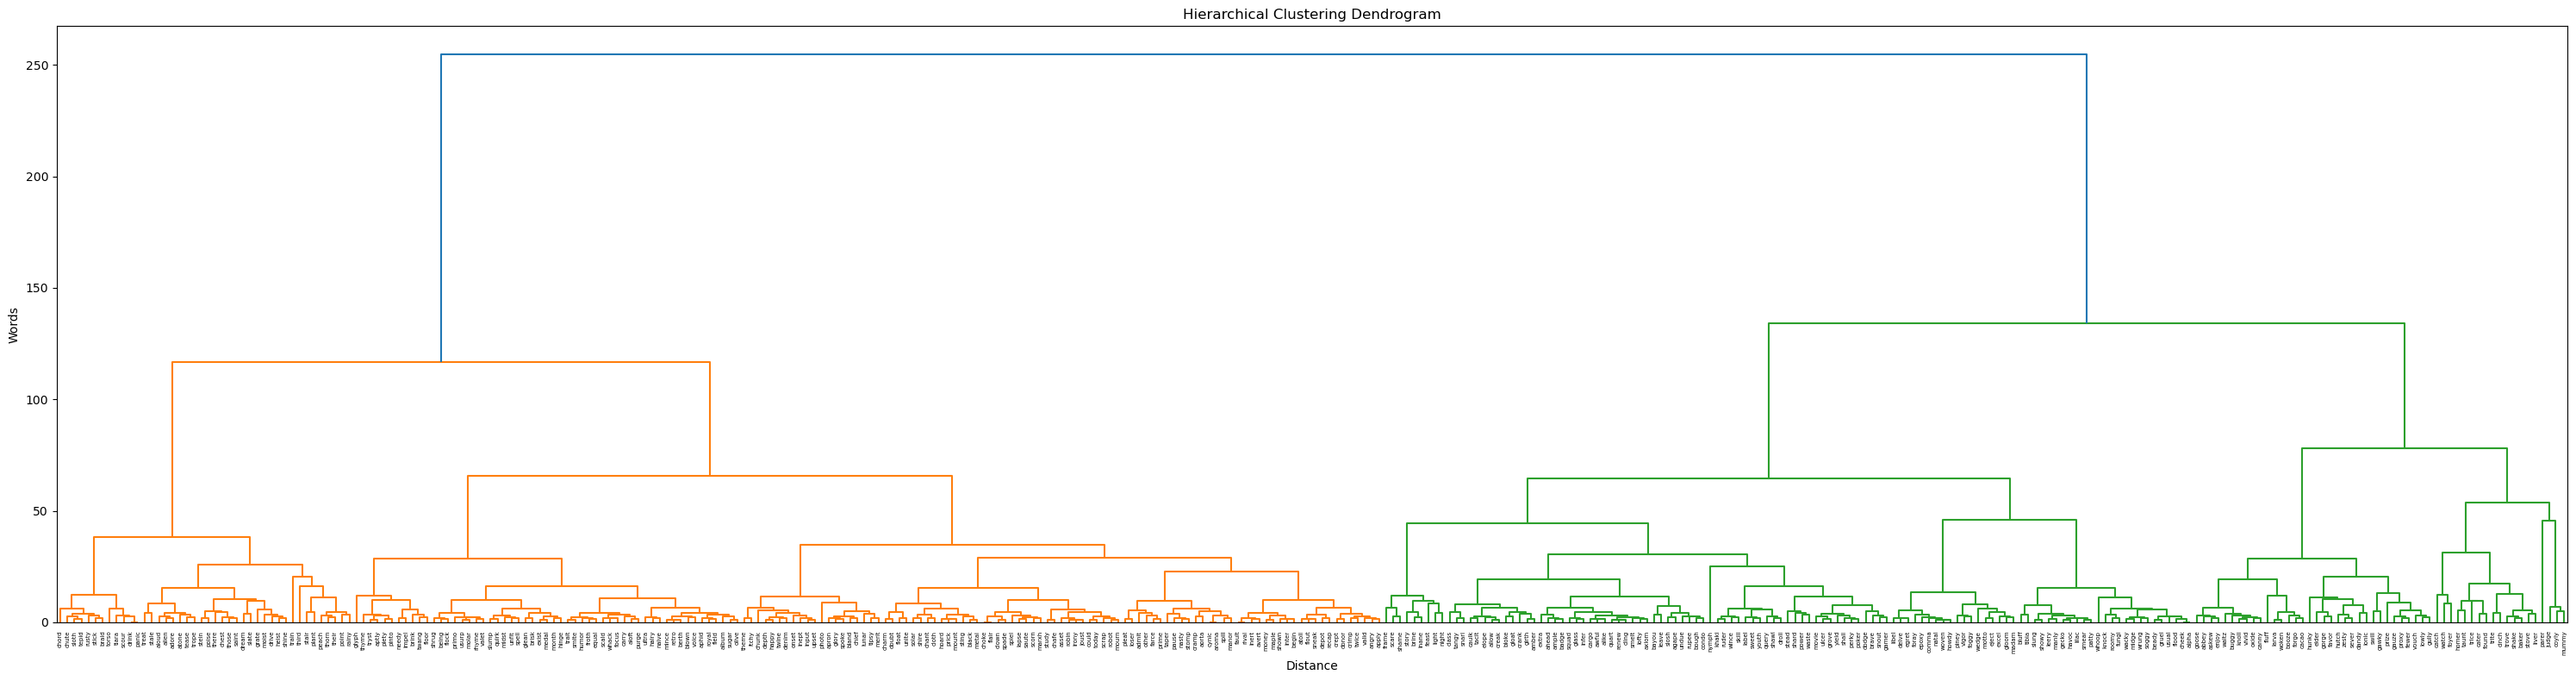

In [70]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据并去除Word列
df = pd.read_excel("cluster.xlsx", index_col=False)
data = df.loc[:, '1 try':'hard rate']


# 通过ward方法计算距离矩阵
Z = linkage(data, method="ward")

# 进行四类划分
clusters = fcluster(Z, t=4, criterion='maxclust')

# 将结果添加到数据框中
df['cluster'] = clusters

# 画谱系聚类树，并根据聚类结果设置不同颜色
plt.figure(figsize=(30, 8))
dendrogram(Z, labels=df["Word"].values, orientation="top",color_threshold=0.7*np.max(Z[:, 2]))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Words')
plt.tight_layout()

# 根据聚类结果，输出每一类的词汇
for i in range(1, 5):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['Word'])
    print()

# 显示图像
plt.show()


In [76]:
df.to_excel("puxi.xlsx")


: 

In [3]:
cluster = pd.read_excel("clustercom.xlsx",index_col=False)
cluster_data = cluster.loc[:,'1 try':'hard rate']
pca = pd.read_excel("PCAcom.xlsx",index_col=False)
pca_data = pca.loc[:, '1 try':'hard rate']
pca_data
hierarchy = pd.read_excel("puxicom.xlsx",index_col=False)
hierarchy_data = hierarchy.loc[:, '1 try':'hard rate']
pca_data
#hierarchy_data

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more,hard rate
0,0.791667,9.408333,30.416667,33.675000,18.033333,6.550000,1.100000,0.078953
1,0.288889,4.037037,20.259259,35.400000,26.422222,11.644444,1.977778,0.073560
2,0.352941,2.843137,12.686275,26.352941,29.235294,21.450980,7.039216,0.066535


<AxesSubplot:ylabel='Density'>

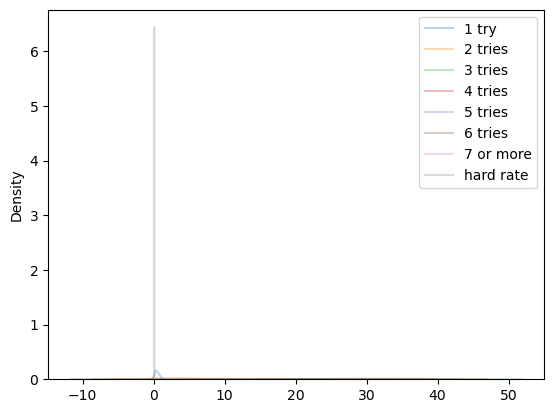

In [63]:

# 绘制每行数据的核密度直方图
#sns.kdeplot(data=cluster_data, fill=True, alpha=.3)
sns.kdeplot(data=pca_data, fill=False, alpha=.3)
#sns.kdeplot(data=hierarchy_data, fill=True, alpha=.3)



<AxesSubplot:ylabel='Density'>

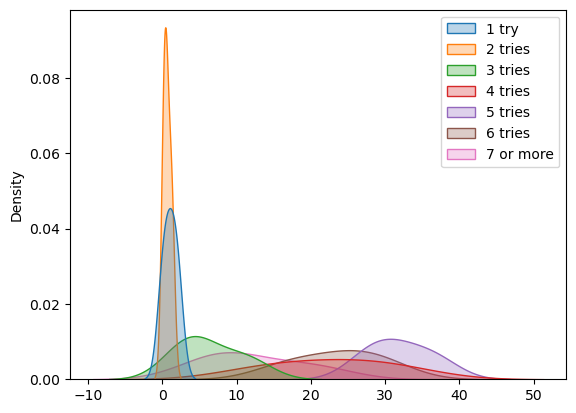

In [65]:
# 读取数据
df = pd.DataFrame({
    '1 try': [0, 1, 2],
    '2 tries': [0.423077, 0.191489, 1.185185],
    '3 tries': [3.064103, 4.659574, 11.129630],
    '4 tries': [13.923077, 23.049645, 30.907407],
    '5 tries': [27.897436, 36.446809, 31.296296],
    '6 tries': [29.128205, 24.382979, 17.240741],
    '7 or more': [19.910256, 9.574468, 7.037037],
    #'hard rate': [0.066209, 0.076055, 0.054205],
})

# 绘制每行数据的核密度直方图
sns.kdeplot(data=df, fill=True, alpha=.3)


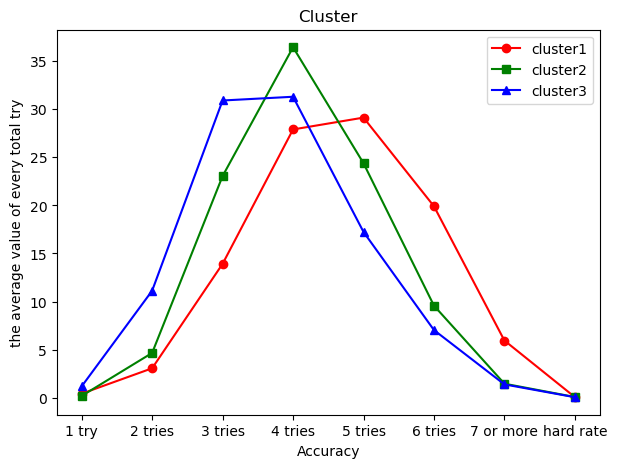

In [58]:


data = [[0, 0.423077, 3.064103, 13.923077, 27.897436, 29.128205, 19.910256, 5.948718, 0.066209],
        [1, 0.191489, 4.659574, 23.049645, 36.446809,24.382979, 9.574468, 1.460993, 0.076055],
        [2, 1.185185, 11.129630, 30.907407, 31.296296, 17.240741, 7.037037, 1.388889, 0.054205]]

df = pd.DataFrame(data, columns=["index", "1 try", "2 tries", "3 tries","4 tries", "5 tries", "6 tries", "7 or more", "hard rate"])

# 设置x轴
x = df.iloc[:, 1:].columns
fig = plt.figure(figsize=(7, 5))
# 绘制三条折线图
plt.plot(x, df.iloc[0, 1:], color='red', marker='o', label='line 1')
plt.plot(x, df.iloc[1, 1:], color='green', marker='s', label='line 2')
plt.plot(x, df.iloc[2, 1:], color='blue', marker='^', label='line 3')

# 添加图例
plt.legend(['cluster1', 'cluster2', 'cluster3'])
plt.xlabel("Accuracy")
plt.ylabel("the average value of every total try")
plt.title("Cluster")
# 显示图像
plt.show()


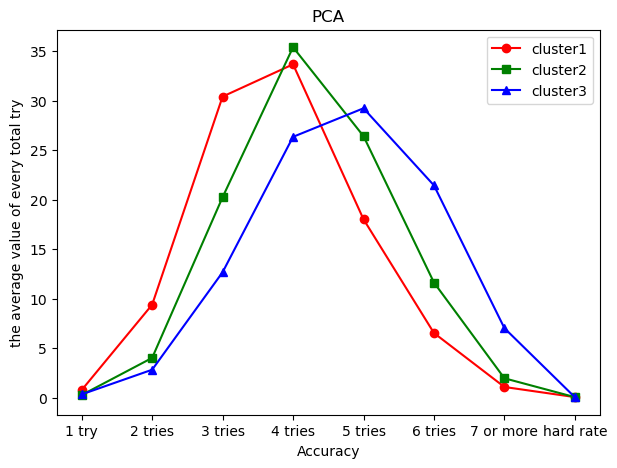

In [57]:

data = [[0, 0.791667, 9.408333, 30.416667, 33.675000, 18.033333, 6.550000, 1.100000, 0.078953],
        [1, 0.288889, 4.037037, 20.259259, 35.400000,
            26.422222, 11.644444, 1.977778, 0.073560],
        [2, 0.352941, 2.843137, 12.686275, 26.352941, 29.235294, 21.450980, 7.039216, 0.066535]]

df = pd.DataFrame(data, columns=["index", "1 try", "2 tries", "3 tries",
                  "4 tries", "5 tries", "6 tries", "7 or more", "hard rate"])

# 设置x轴
x = df.iloc[:, 1:].columns
fig = plt.figure(figsize=(7, 5))
# 绘制三条折线图
plt.plot(x, df.iloc[0, 1:], color='red', marker='o', label='cluster1')
plt.plot(x, df.iloc[1, 1:], color='green', marker='s', label='cluster2')
plt.plot(x, df.iloc[2, 1:], color='blue', marker='^', label='cluster3')

# 添加图例
plt.legend(loc='best')
plt.xlabel("Accuracy")
plt.ylabel("the average value of every total try")
plt.title("PCA")
# 显示图像
plt.show()



<Figure size 800x600 with 0 Axes>

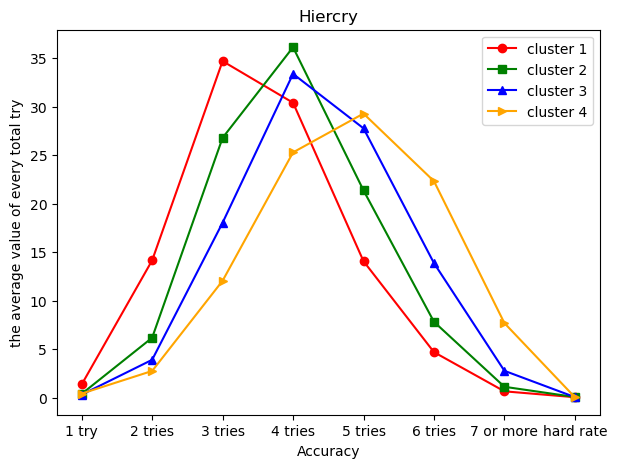

In [60]:
# 定义数据
data = [[1.375000, 14.166667, 34.708333, 30.416667, 14.083333, 4.708333, 0.666667, 0.061376],
        [0.404255, 6.191489, 26.801418, 36.141844,21.382979, 7.836879, 1.134752, 0.080406],
        [0.322917, 3.916667, 18.052083, 33.395833,27.781250, 13.885417, 2.781250, 0.070835],
        [0.433333, 2.766667, 12.066667, 25.300000, 29.300000, 22.333333, 7.700000, 0.05906]]

# 创建 DataFrame
df = pd.DataFrame(data, columns=["1 try", "2 tries", "3 tries","4 tries", "5 tries", "6 tries", "7 or more", "hard rate"])
fig = plt.figure(figsize=(8,6))
# 设置 x 轴
x = df.columns
fig = plt.figure(figsize=(7, 5))
# 设置颜色和符号
colors = ['red', 'green', 'blue','orange']
markers = ['o', 's', '^','>']

# 绘制折线图
for i in range(4):
    plt.plot(x, df.iloc[i, :], color=colors[i],marker=markers[i], label='cluster {}'.format(i+1))

# 添加图例
plt.legend(loc='best')

plt.xlabel("Accuracy")
plt.ylabel("the average value of every total try")
plt.title("Hiercry")
# 显示图像
plt.show()
